In [2]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original', data_home=".")

X = mnist.data / 255
y = mnist.target


/Users/maeda/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/maeda/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


この画像データのラベルは8です


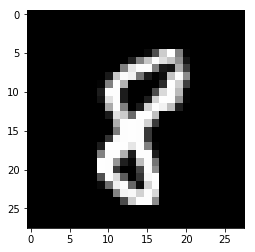

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

idx = int(np.random.rand() * len(X))
plt.imshow(X[idx].reshape(28,28), cmap='gray')
print('この画像データのラベルは{:.0f}です'.format(y[idx]))

In [21]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.Tensor(y_train)
y_test = torch.Tensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)



In [7]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28 * 28 * 1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))
print(model)


Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [8]:
from torch import optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [9]:
def train(epoch):
    model.train()
    for data, targets in loader_train:
        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()

    print('epoch{}:終了\n'.format(epoch))


In [19]:
def test():
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, targets in loader_test:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            
            v = targets.data.view_as(predicted)
            print(v)
            a = predicted.eq(v)
            correct += a.sum()
    data_num = len(loader_test.dataset)
    print('\nテストデータの正解率：{}/{} ({;.0f)%\n'.format(correct, data_num, 100. * correct / data_num))



In [20]:
test()

tensor([1., 9., 2., 2., 7., 1., 8., 3., 3., 7., 7., 5., 0., 1., 2., 9., 2., 7.,
        7., 9., 9., 8., 5., 8., 1., 2., 3., 7., 5., 5., 6., 0., 9., 0., 2., 5.,
        0., 0., 2., 9., 5., 7., 2., 4., 8., 6., 0., 8., 3., 9., 9., 4., 3., 9.,
        8., 1., 6., 0., 3., 1., 9., 6., 4., 0.])


RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'other'

In [12]:
for epoch in range(3):
    train(epoch)

test()

RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'target'